<a href="https://colab.research.google.com/github/imemmul/Food_classification_EfficientNetB4/blob/main/food_classification_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### My first attempt was a little bit unsuccessful so now I am going to try to use all things that I've got

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f97badbb-f3ac-9384-10f8-412bf4459434)


In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-09-01 19:48:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-01 19:48:18 (117 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import plot_loss_curves, compare_historys, create_tensorboard_callback

In [5]:
import tensorflow_datasets as tfds

In [6]:
datasets_list = tfds.list_builders()
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incompleteXS7KM8/food101-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incompleteXS7KM8/food101-validation.tfrecord*...:   0%|         …

Dataset food101 downloaded and prepared to ~/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [8]:
len(train_data)

75750

In [10]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

#### We have 101 different food types to train

In [12]:
class_names = ds_info.features["label"].names
#adding classes to a variable

In [23]:
train_data_sample_1 = train_data.take(5)

In [24]:
train_data_sample_1

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [25]:
for image, label in train_data_sample_1:
  print(f"""
    Image Shape: {image.shape}
    Image datatype: {image.dtype}
    Target Class: {label}
    class name: {class_names[int(label)]}
  """)


    Image Shape: (341, 512, 3)
    Image datatype: <dtype: 'uint8'>
    Target Class: 98
    class name: tiramisu
  

    Image Shape: (512, 512, 3)
    Image datatype: <dtype: 'uint8'>
    Target Class: 65
    class name: mussels
  

    Image Shape: (512, 512, 3)
    Image datatype: <dtype: 'uint8'>
    Target Class: 38
    class name: fish_and_chips
  

    Image Shape: (512, 512, 3)
    Image datatype: <dtype: 'uint8'>
    Target Class: 34
    class name: eggs_benedict
  

    Image Shape: (512, 512, 3)
    Image datatype: <dtype: 'uint8'>
    Target Class: 62
    class name: macaroni_and_cheese
  


Upper print shows us that our data not one-hot encoded so should consider "Sparse" while compiling our model.

In [26]:
import tensorflow as tf

(-0.5, 511.5, 511.5, -0.5)

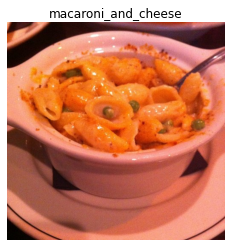

In [27]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[int(label)])
plt.axis(False)